Data Preprocessing:
* Load the dataset

* Check for missing values and handle them if any.

* Scale the numerical features if necessary (since clustering algorithms are sensitive to feature scales).

In [2]:
##Install openpyxl
!pip install openpyxl

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
df = pd.read_excel("/content/EastWestAirlines.xlsx", sheet_name=1)
from sklearn.decomposition import PCA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [3]:
print(df.describe())

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [4]:
print(df.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [9]:
# Outlier treatment
for col in df.select_dtypes(include=np.number).columns:
    df = df[(np.abs(df[col]-df[col].mean()) <= (3*df[col].std()))]

In [10]:
##Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

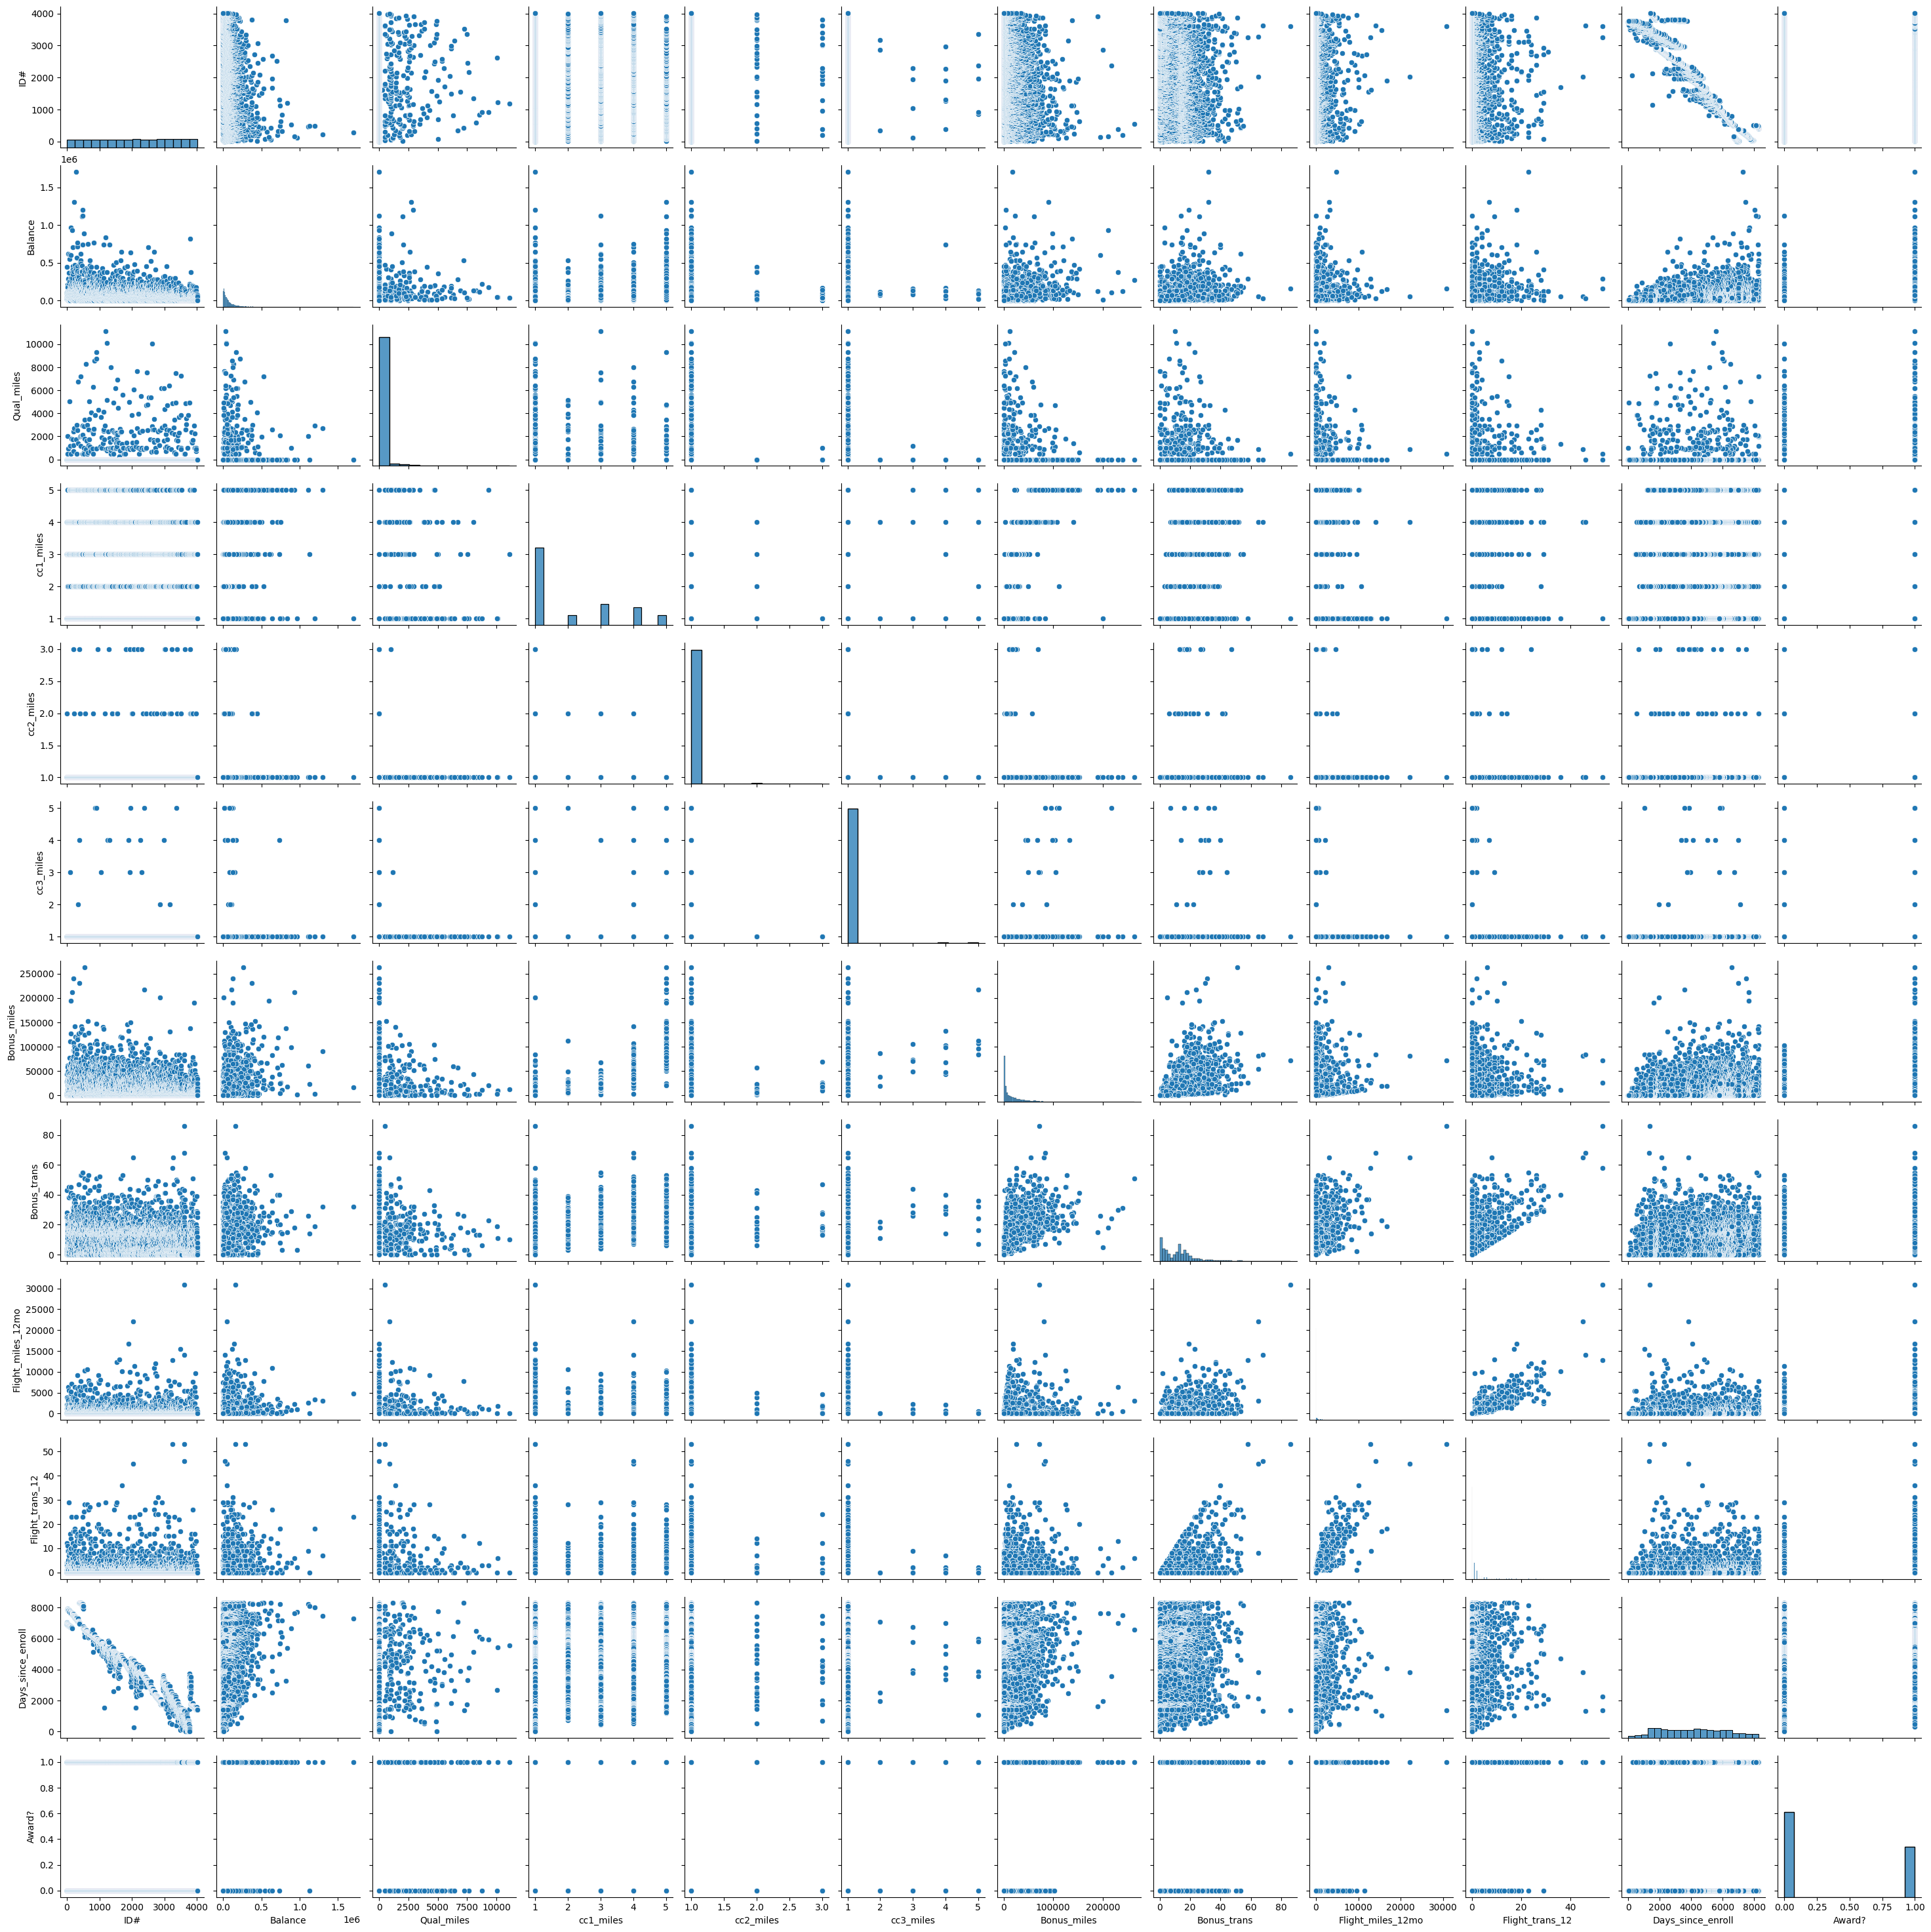

In [5]:
# Visualizations
sns.pairplot(df)
plt.show()

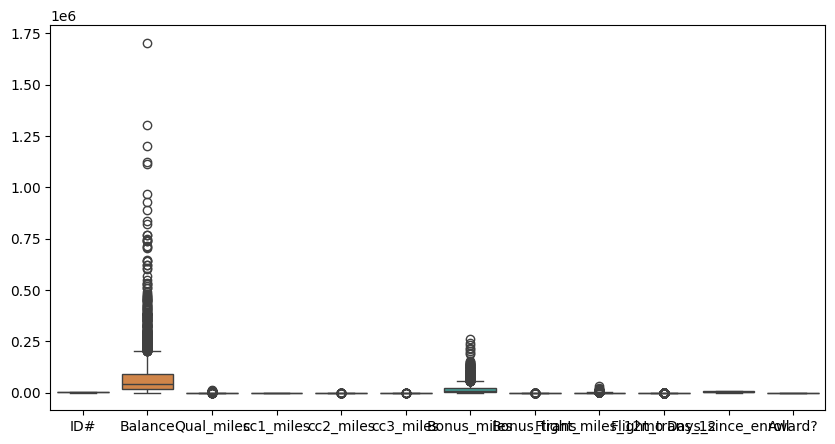

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

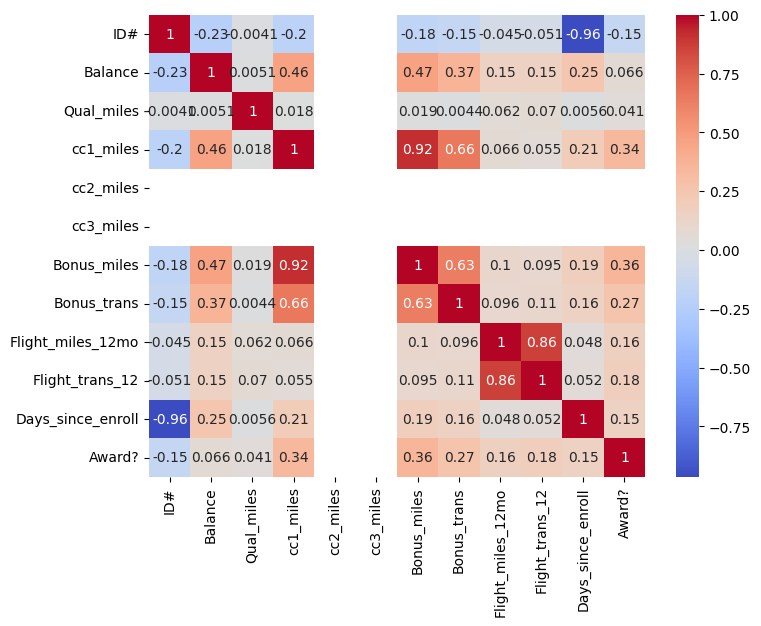

In [11]:
#Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

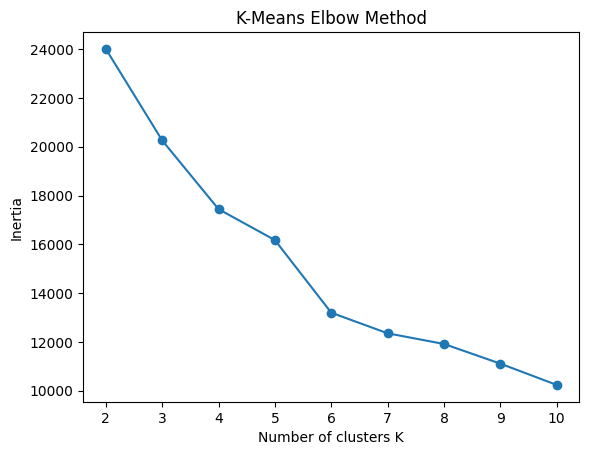

In [12]:
##K-Means
##Implementing Clustering Algorithms
#Elbow Method to find optimal K
inertia = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('K-Means Elbow Method')
plt.show()

In [13]:
#Fit KMeans with chosen K (example K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [14]:
# Evaluation
print("KMeans Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))
print("KMeans Davies-Bouldin Score:", davies_bouldin_score(scaled_data, kmeans_labels))

KMeans Silhouette Score: 0.29607056702452816
KMeans Davies-Bouldin Score: 1.4179604795189469


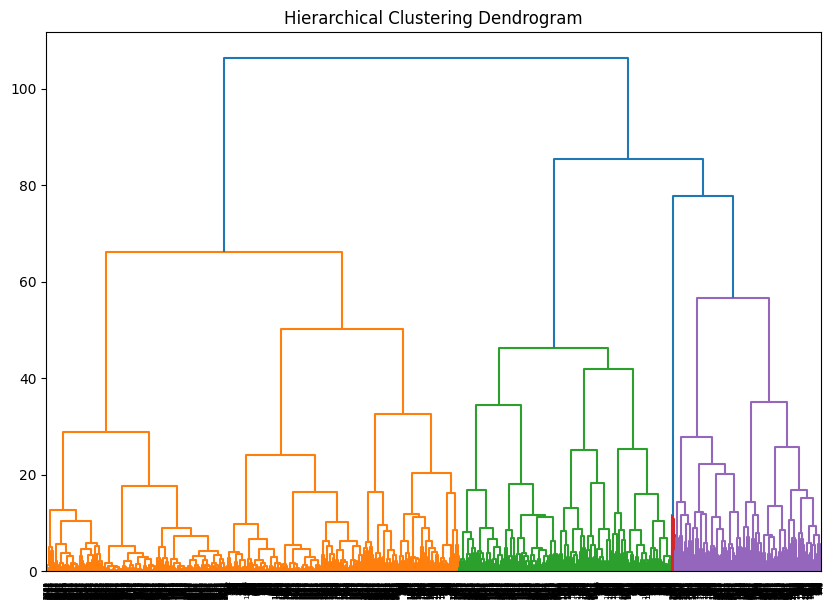

Hierarchical Silhouette Score: 0.2213715194108844
Hierarchical Davies-Bouldin Score: 1.7372696412292308


In [15]:
##Hierarchical Clustering
# Dendrogram to choose number of clusters
linked = linkage(scaled_data, method='ward')  # try 'single', 'complete', 'average'
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Fit Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(scaled_data)

# Evaluation
print("Hierarchical Silhouette Score:", silhouette_score(scaled_data, agglo_labels))
print("Hierarchical Davies-Bouldin Score:", davies_bouldin_score(scaled_data, agglo_labels))

In [16]:
#DBSCAN
# Fit DBSCAN (tune eps and min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Number of clusters identified (ignore noise)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("DBSCAN identified clusters:", n_clusters_dbscan)

DBSCAN identified clusters: 23


In [17]:
# Evaluation (only if more than 1 cluster)
if n_clusters_dbscan > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_data, dbscan_labels))
    print("DBSCAN Davies-Bouldin Score:", davies_bouldin_score(scaled_data, dbscan_labels))
else:
    print("DBSCAN silhouette score not applicable (single cluster or all noise)")

DBSCAN Silhouette Score: -0.3013902701723775
DBSCAN Davies-Bouldin Score: 1.5606603775559709


In [18]:
#Cluster Analysis and Interpretation
#Adding cluster labels to dataset
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = agglo_labels
df['DBSCAN_Cluster'] = dbscan_labels

In [19]:
print(df.head())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
5    6    16420           0          1          1          1            0   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
5            0                  0                0               6942       0   

   KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cl

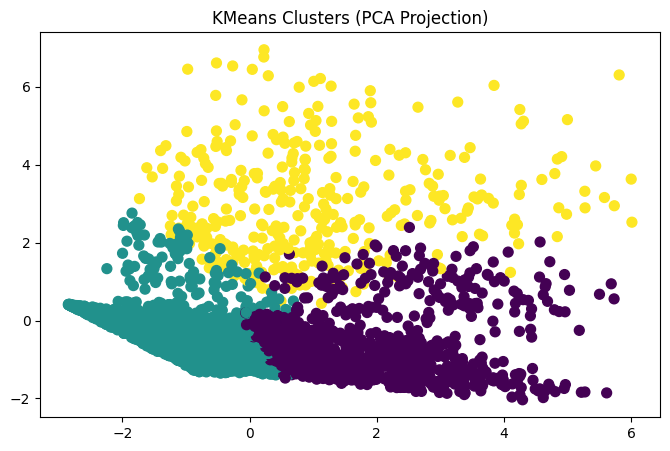

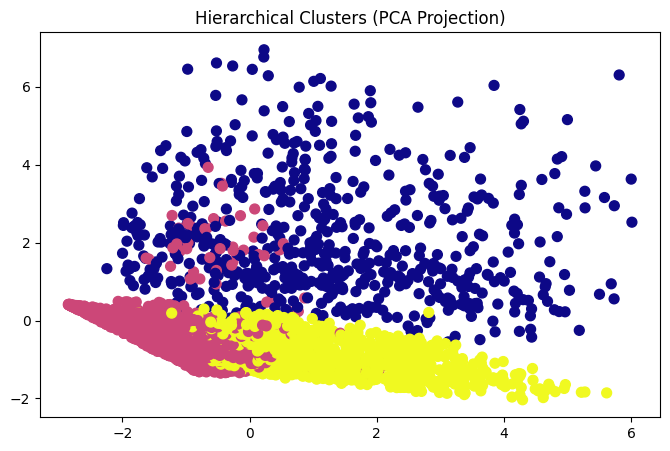

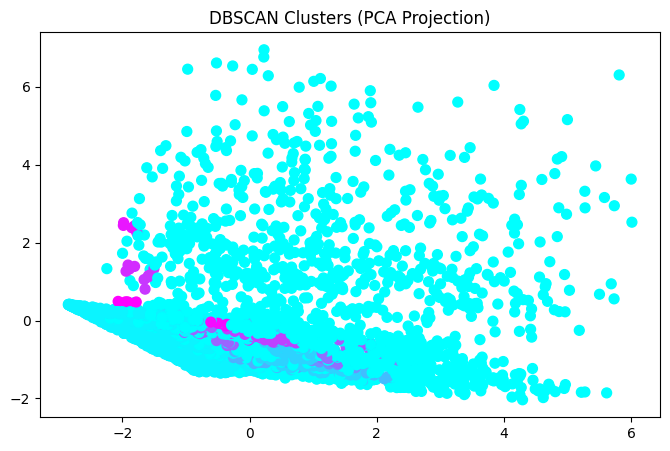

In [24]:

# PCA for 2D visualization of clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# KMeans visualization
plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clusters (PCA Projection)')
plt.show()

# Hierarchical visualization
plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=agglo_labels, cmap='plasma', s=50)
plt.title('Hierarchical Clusters (PCA Projection)')
plt.show()

# DBSCAN visualization
plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels, cmap='cool', s=50)
plt.title('DBSCAN Clusters (PCA Projection)')
plt.show()

In [ ]:
# Column rename
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [ ]:
#Set ID as Index Column
df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


# Data Exploration:
Descriptive Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [ ]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take
print('unique_cc1',df.cc1_miles.unique())
print('unique_cc2',df.cc2_miles.unique())
print('unique_cc3',df.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [ ]:
##Duplicate Value check
df.duplicated().sum()

np.int64(1)

In [ ]:
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
##Missing values check
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

# Exploratory Data Analysis.

Lets analyze the features by creating histograms to understand the distribution

In [ ]:
##Distribution plots
import plotly.express as px
for column in df.columns:
    fig = px.histogram(df, x=column, title=f'{column} Distribution')
    fig.show()